In [2]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab
from scipy.signal import argrelmax, argrelmin
import pickle
%matplotlib inline

### Load all data into memory

In [3]:
from IPython.html.widgets import interact #import interactive tools
filenames = np.loadtxt('../datafiles/dtboxnames.txt', dtype='str')

def data_selector(filename):
    
    global plotname
    plotname = filename
    global data_dict
    #open pickled object
    with open('../datafiles/'+ str(filename), 'rb') as infile:
        data_dict = pickle.load(infile)
        
    return data_dict
        
interact(data_selector, filename=filenames.tolist())

In [25]:
with open ('../../redshift_files/all_redshifts.txt', "r") as myfile:
        redshifts=myfile.read().splitlines()

#set upper value and lover value of redshifts
z_upper_limit = 11.313
z_lower_limit = 5

# selects redshift indexes between the limits
indexes = sp.where( (np.array([float(z) for z in redshifts]) <= z_upper_limit) & \
                   (np.array([float(z) for z in redshifts]) >= z_lower_limit))

#use the above indexes to select the desired redhifts
redshifts = redshifts[indexes[0][0]:indexes[0][-1] +1]

thresholds = data_dict[str(redshifts[0])]['thresholds']

### V3 as function of threshold $\theta_{th}$

<function __main__.plot_explorer>

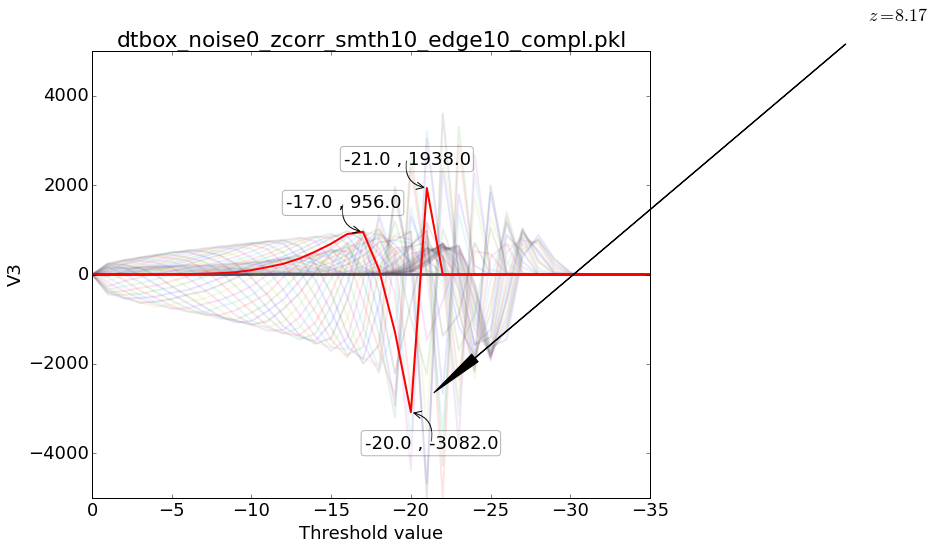

In [26]:
from IPython.html.widgets import interact #import interactive tools

#setting plotting visual parameters
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
pylab.rcParams.update({'font.size': 18})

#define function to use in ipyton interact widget
def plot_explorer(plotnr, ylim_pos=5000, ylim_neg=-5000, local_extrema='True'):
    
    # plots all data
    for z in redshifts:
        
        V3 = data_dict[z]['CV3']
        thresholds = data_dict[z]['thresholds']
        plt.plot(thresholds, V3, linewidth=2, alpha=0.1)
        plt.xlabel('Threshold value')
        plt.ylabel('V3')
        plt.ylim(ylim_neg, ylim_pos)
        plt.xlim(0,-35)
        
    #selects redshift to highligt from plotnr parameter
    z = redshifts[plotnr]
    V3 = data_dict[z]['CV3']
    thresholds = data_dict[z]['thresholds']
    #plots highlighted redshift curve and annotates it
    
    plt.plot(thresholds, V3, linewidth=2, alpha=1, color='red')
    plt.title(str(plotname))
    plt.xlabel('Threshold value')
    plt.ylabel('V3')
    plt.annotate('$z = ' + str(z) + '$', xy=(thresholds[20], V3[20]),
                xytext=(0.5, 0.1), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth =10),
                horizontalalignment='right', verticalalignment='top',
                )
    
    if local_extrema == 'True':
        
        V3_maximums = argrelmax(V3)[0]
        V3_minimums = argrelmin(V3)[0]

        for maximum in V3_maximums:
            plt.annotate(str(thresholds[maximum]) + ' , ' + str(round(V3[maximum])), xy=(thresholds[maximum],V3[maximum]), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='black'))

        for minimum in V3_minimums:
            plt.annotate(str(thresholds[minimum]) + ' , ' + str(round(V3[minimum])), xy=(thresholds[minimum],V3[minimum]), xytext=(20,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='black'))
            
    plt.savefig('V3_threshold.png')
        
interact(plot_explorer, plotnr=(0,len(redshifts) - 1,1), ylim_pos = (0,5*10**6,1000), ylim_neg = (-5*10**6,0,1000), local_extrema=['True', 'False'])

### V3 as function of global ionization fraction $x_{glob}$

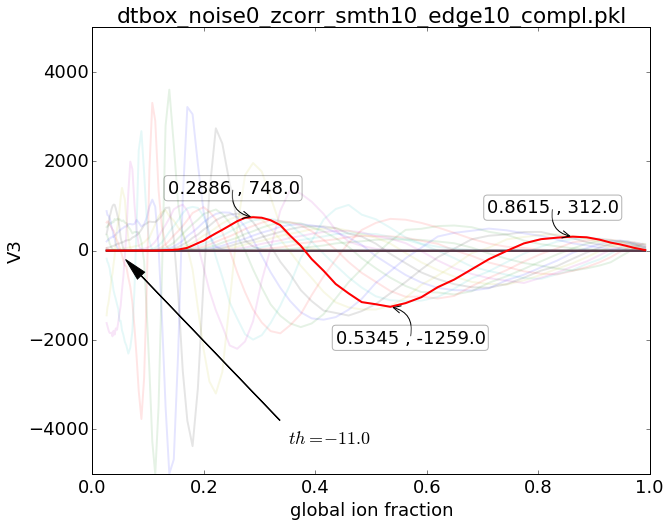

In [27]:
from IPython.html.widgets import interact #import interactive tools

#setting plotting visual parameters
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
pylab.rcParams.update({'font.size': 18})
    
#define function to use in ipyton interact widget
def plot_explorer(threshold_value, ylim_pos=5000, ylim_neg=-5000, local_extrema='True'):
        
    i = 0
    for th in thresholds:
        V3 = np.array([])
        ion_frac_vol = np.array([])
        for z in redshifts:

            V3 = np.append(V3,data_dict[z]['CV3'][i])
            ion_frac_vol = np.append(ion_frac_vol,data_dict[z]['ion_frac_vol'])

        plt.plot(ion_frac_vol, V3, linewidth=2, alpha=0.1)
        plt.xlabel('redshift')
        plt.ylabel('V3')
        plt.ylim(ylim_neg, ylim_pos)
        i +=1
        
    #selects redshift to highligt from plotnr parameter
    th = thresholds[threshold_value]
    V3 = np.array([])
    ion_frac_vol = np.array([])
    for z in redshifts:

        V3 = np.append(V3,data_dict[z]['CV3'][threshold_value])
        ion_frac_vol = np.append(ion_frac_vol,data_dict[z]['ion_frac_vol'])
    
    #plots highlighted redshift curve and annotates it
   

    plt.plot(ion_frac_vol, V3, linewidth=2, alpha=1, color='red')
    plt.xlabel('global ion fraction')
    plt.ylabel('V3')
    plt.title(str(plotname))
    plt.annotate('$th = ' + str(th) + '$', xy=(ion_frac_vol[11], V3[11]),
                xytext=(0.5, 0.1), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth =10),
                horizontalalignment='right', verticalalignment='top',
                )
    
    if local_extrema == 'True':
        
        V3_maximums = argrelmax(V3)[0]
        V3_minimums = argrelmin(V3)[0]
        

        for maximum in V3_maximums:
            #print V3[maximum], ion_frac_vol[maximum]
            #print ion_frac_vol[maximum], round(V3[maximum])
            plt.annotate(str(ion_frac_vol[maximum]) + ' , ' + str(round(V3[maximum])), xy=(ion_frac_vol[maximum],V3[maximum]), xytext=(-20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='black'))

        for minimum in V3_minimums:
            #print V3[minimum], ion_frac_vol[minimum]
            #print ion_frac_vol[minimum], round(V3[minimum])
            plt.annotate(str(ion_frac_vol[minimum]) + ' , ' + str(round(V3[minimum])), xy=(ion_frac_vol[minimum],V3[minimum]), xytext=(20,-40), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='black'))
            
    plt.savefig('V3_global.png')
        
interact(plot_explorer, threshold_value=(0,len(thresholds)-1,1), ylim_pos = (0,5*10**6,1000), ylim_neg = (-5*10**6,0,1000), local_extrema=['True', 'False'])